# Library

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import time
from datetime import datetime

plt.rcParams.update({
    'figure.figsize': [4.0, 4.0],
    'font.size' : 15,
    'font.family': 'Arial',
    'font.style' : 'normal',
    'font.weight':'normal',
    'figure.titleweight': 'normal',
    'axes.labelsize': 14 ,
    'axes.titleweight': 'normal',
    'axes.labelweight': 'normal',
    'axes.spines.right': False,
    'axes.spines.top': False,
})

# Reference Building

## human TF

In [2]:
QC = pd.read_csv("/fs/home/dongxin/Files/cistrome/human/human_factor_full_QC.txt", sep = "\t", index_col=0)

In [3]:
# correct
QC.loc[56245,'Factor'] = 'TEAD1'
QC.loc[86201,'Factor'] = 'Input'
QC.loc[88593,'Factor'] = 'TP53'
QC.loc[88589,'Factor'] = 'TP53'
QC.loc[88590,'Factor'] = 'TP53'
QC.loc[88587,'Factor'] = 'TP53'
QC.loc[88591,'Factor'] = 'TP53'
QC.loc[88588,'Factor'] = 'TP53'
QC.loc[94019,'Factor'] = 'RELA'
QC.loc[89909,'Factor'] = 'SPI1'
QC.loc[94017,'Factor'] = 'SPI1'
QC.loc[91101,'Factor'] = 'SPI1'
QC.loc[89908,'Factor'] = 'SPI1'
QC.loc[86683,'Factor'] = 'NR3C1'
QC.loc[91098,'Factor'] = 'SPI1'
QC.loc[43234,'Factor'] = 'NPPA'
QC.loc[34677,'Factor'] = 'ESR2'
QC.loc[50107,'Factor'] = 'MIXL1'
QC.loc[50108,'Factor'] = 'MIXL1'
QC.loc[52969,'Factor'] = 'BATF2'
QC.loc[39012,'Factor'] = 'MECOM'
QC.loc[34675,'Factor'] = 'ESR2'
QC.loc[52573,'Factor'] = 'PGR'
QC.loc[52574,'Factor'] = 'PGR'
QC.loc[48755,'Factor'] = 'POLR2A'
QC.loc[70752,'Factor'] = 'EZH2'
QC.loc[48704,'Factor'] = 'FXR'
QC.loc[67599,'Factor'] = 'ELF3'
QC.loc[83918,'Factor'] = 'CTCF'
QC.loc[37565,'Factor'] = 'AP4'
QC.loc[40164,'Factor'] = 'RUNX1'
QC.loc[39784,'Factor'] = 'RUNX1'
QC.loc[38173,'Factor'] = 'ERF'
QC.loc[37565,'Factor'] = 'AP4'
QC.loc[2467,'Factor'] = 'RXRA'
QC.loc[2814,'Factor'] = 'RXRA'
QC.loc[2813,'Factor'] = 'RXRA'
QC.loc[82146,'Factor'] = 'POLR2A'
QC.loc[86686,'Factor'] = 'NR3C1'
QC.loc[56668,'Factor'] = 'AR'
QC.loc[8456,'Factor'] = 'SMAD1'
QC.loc[50878,'Factor'] = 'POLR2A'
QC.loc[87159,'Factor'] = 'SMARCA4'
QC.loc[70119,'Factor'] = 'NEUROD1'
QC.loc[[48277, 48279, 48280, 48263, 48278],'Factor'] = 'GABPA'



QC.drop(index=[6559], inplace=True) #Input
QC.drop(index=[70093, 70095], inplace=True) #H3K4me3
QC.drop(index=[49180], inplace=True) #GFP
QC.drop(index=[85740], inplace=True) #Input
QC.drop(index=[88981], inplace=True) #H3K4me
QC.drop(index=[85741], inplace=True) #Input
QC.drop(index=[88976], inplace=True) #H3K4me
QC.drop(index=[88980], inplace=True) #H3K4me
QC.drop(index=[49936], inplace=True) #Input
QC.drop(index=[43237], inplace=True) #H2AZ
QC.drop(index=[6573,6572], inplace=True) #Input
QC.drop(index=[73452, 72089], inplace=True) #MLL-AF4
QC.drop(index=[73462], inplace=True) #MLL-AF9
QC.drop(index=[86202], inplace=True) #Input
QC.drop(index=[38173], inplace=True) #EBNA2
# QC.drop(index=[104822], inplace=True) #ASCL1-NEUROG2-Chimera
QC.drop(index=QC[QC.loc[:,'Factor'] == 'FAIRE'].index, inplace=True) #FAIRE
QC.drop(index=[39352, 46058, 58874, 58873, 8412], inplace=True) #remove 46058 GATA3 dataset, this datasets motif looks weird, seems not a GATA chip seq
QC.drop(index=[49737, 86793, 46149, 46294, 62560, 62561], inplace=True) #remove these datasets, these datasets' motif looks weird, seems chip antibody is bad
QC.drop(index=[8673], inplace=True) #mouse sample

# remove 62513 ID3 dataset, redownload from https://www.encodeproject.org/files/ENCFF375SIS/@@download/ENCFF375SIS.bed.gz  (encode website)

In [11]:
QC = QC[(QC['FRiP']>0.01) & (QC['FastQC']>25) & (QC['PeaksUnionDHSRatio']>0.7) & (QC['PBC']>0.8) & (QC['UniquelyMappedRatio']>0.5) & (QC['PeaksFoldChangeAbove10'] > 100)]
QC.Factor.unique().__len__()

2

In [12]:
QC.to_csv('~/human_ca.csv', sep='\t')

In [33]:
factor_list = QC.Factor.unique().tolist()
keep_max_n = 1
for f in factor_list:
    if len(QC[(QC["Factor"] == f)]) > keep_max_n:
        print(f)
        need_remove_table_factor = QC[(QC["Factor"] == f)].copy()
        cell_line_list = need_remove_table_factor.Cell_line.unique().tolist()
        cell_type_list = need_remove_table_factor.Cell_type.unique().tolist()
        tissue_type_list = need_remove_table_factor.Tissue_type.unique().tolist()
        for cl in cell_line_list:
            for ct in cell_type_list:
                for tt in tissue_type_list:
#                     print(f, cl,ct,tt)
                    check_table = need_remove_table_factor[(need_remove_table_factor["Cell_line"] == cl) & (need_remove_table_factor["Cell_type"] == ct) & (need_remove_table_factor["Tissue_type"] == tt)]
                    if len(check_table) > keep_max_n:
                        need_remove_table_cl = check_table.copy()
                        remove_id = list(set(need_remove_table_cl.index.tolist()) - set(need_remove_table_cl.sort_values(by="PeaksFoldChangeAbove10", ascending=False).head(keep_max_n).index.tolist()))
                        QC = QC.drop(index=remove_id)
                    else:
                        continue
    else:
        continue

SMAD3
CDX2
GATA6
HNF4A
NOTCH1
RBPJ
ZNF143
VDR
JUND
MAX
MYC
POLR2A
EOMES
EP300
FOXH1
FOXP1
SMAD2/3
SMAD4
TRIM28
E2F1
ELK4
GATAD1
C17orf49
H2AZ
NR2C2
NR3C1
PHF8
RELA
STAT1
CEBPA
CTCF
RAD21
STAG1
FOS
GATA2
RBL2
TAL1
BCL6
GATA1
JUN
NFYA
NFYB
RUNX1
ZNF263
AR
FOXA1
ESR1
GATA3
TFAP2A
TFAP2C
PML
CREBBP
RARA
RXRA
ERG
HDAC1
PPARG
RXRG
SMARCA4
TP63
SOX2
RUNX2
FLI1
CEBPB
POLR2M
NKX3-1
POU5F1
SPI1
ETV4
TP73
TP53
SRC
BCLAF1
YY1
ATF3
BHLHE40
HEY1
JUNB
SMAD1
TCF7L2
RNF2
HDAC3
EZH2
CHD1
HDAC2
KDM1A
RBBP5
SAP30
CHD7
KDM5A
KDM4A
SUZ12
TCF7L1
TCF12
HCFC1
GABPA
SMC1A
NIPBL
BRD4
CDK9
MED1
PR
KLF4
TET2
SMC3
CDK8
NANOG
STAT3
SUMO1
MECP2
PAX5
KMT2A
FOXM1
BCOR
NCOR1
NCOR2
HSF1
GRHL2
NKX2-1
REST
NR2F2
NR2F1
SUMO2
REPIN1
BRD2
HIRA
RB1
MYOD1
CTBP1
GTF2B
GREB1
E2F4
TLE3
CREB1
FOXA2
CBFB
MYH11
ETS1
SSRP1
E2F7
MED12
NFATC1
LHX2
HINFP
HOXB13
TFDP1
RFX1
KLF5
SP2
KLF1
NFE2
BACH2
RUNX1T1
OGT
ICE1
ZC3H8
CDK7
IRF4
MBD2
IRF1
ZFX
TEAD4
MAFK
POLR3D
JARID2
ZBTB17
ATF2
GLI2
STAT2
CTCFL
ZNF83
XBP1
BRD3
JMJD6
EBNA3C
TERF2
HOXC9
B

In [18]:
raw_folder_path = "/fs/data/cistrome/peak/human_factor/"
aim_path = '/fs/home/dongxin/Projects/SCRIPT/indices/human/tf_chip_qc_5fold_motif/'

In [19]:
for dcid in QC.index:
    factor = QC.loc[dcid, "Factor"]
    if "/" in factor or "_" in factor:
        factor = factor.replace("/", "or").replace("_", "")
    os.system("cp %s/%s_*.bed %s/%s_%s.bed" % (raw_folder_path, dcid, aim_path, factor, dcid))

In [4]:
# length_table = pd.read_csv('/fs/home/dongxin/Projects/SCRIPT/indices/human/tf_chip_qc_5fold_motif_index/human_tf_index.tsv', sep='\t', index_col=1)
# length_table['total_bp'] = np.round(length_table['Number of regions']*length_table['Avg size'])/10000
# length_table.index = [i[0:-7] for i in length_table.index]

# pd.DataFrame(length_table.loc[:,"total_bp"]).to_csv('/fs/home/dongxin/Projects/SCRIPT/indices/human/tf_chip_qc_5fold_motif/peaks_length.txt', sep='\t', header=None)

```bash
rm ID3_62513.bed
wget https://www.encodeproject.org/files/ENCFF375SIS/@@download/ENCFF375SIS.bed.gz -O ID3_62513.bed.gz
gunzip ID3_62513.bed.gz
```

```bash

for file in *.bed
do
    echo ${file}
    awk -F "\t" '$7>5 {print}' ${file} | sort --buffer-size 2G -k1,1 -k2,2n -k3,3n | bedtools merge | bgzip -c > ${file}.gz #sort -nr -k 7 |
done
rm *.bed
```

```bash
for i in *.bed.gz; do echo ${i::-7}; number=`zcat $i | wc -l`; echo -e ${i::-7}'\t'$number >> peaks_number.txt ;done


for i in `awk '{if ($2 < 1000) print $1}' peaks_number.txt`
do
rm ${i}*
done

rm peaks_number.txt; for i in *.bed.gz; do echo ${i::-7}; number=`zcat $i | wc -l`; echo -e ${i::-7}'\t'$number >> peaks_number.txt ;done
```

### motif

```bash
for i in *.motif
do
    scanMotifGenomeWide.pl ${i} hg38 -bed > ../motif_bed/${i/.motif/}.bed
done

cut -f 1,2,3 hg38-ccREs.bed > hg38-ccREs.3col.bed
cat DHS_hg38.bed hg38-ccREs.3col.bed | bedtools sort | bedtools merge > hg38_DHS_all.bed
bedtools intersect -v -a hg38_DHS_all.bed -b hg38_blacklist.bed.gz > hg38_all_DHS_remove_black.bed

n=0
for f in *
do 
    fl[$n]=$f
    let 'n++'
done

i=0
while(($i < $n))
do
    nc=`ps -ef | grep wanglab | grep bedtools | grep intersect | wc -l`
    if [ ${nc} -le 40 ]
    then
        echo ${fl[$i]}
        bedtools intersect -wa -a ${fl[$i]} -b ../hg38_all_DHS_remove_black.bed | sort -k 5 -nr | head -n 25000 | awk -F '\t' '{X=170; mid=(int($2)+int($3))/2;printf("%s\t%d\t%d\t%s\t%f\n",$1,(mid-X<0?0:mid-X),mid+X,$4,$5);}' | bedtools sort | bedtools merge > ../bed_with_CCRE_resize/${fl[$i]} &
        let 'i++'
    else
        sleep 3
    fi
done


for i in *
do
    echo $i
    filename=${i/.bed/}_motif.bed
    cat ${i} | bgzip -c > ../tf_chip_qc_5fold_motif/${filename}.gz
done


for i in *.bed.gz; do echo ${i::-7}; number=`zcat $i | wc -l`; echo -e ${i::-7}'\t'$number >> peaks_number.txt ;done

for i in `awk '{if ($2 < 1000) print $1}' peaks_number.txt`
do
    rm ${i}*
done

rm peaks_number.txt; for i in *.bed.gz; do echo ${i::-7}; number=`zcat $i | wc -l`; echo -e ${i::-7}'\t'$number >> peaks_number.txt ;done

ulimit -n 4096 
giggle index -i '*.bed.gz' -o ../tf_chip_qc_5fold_motif_giggle -f -s 


cd ..
cp tf_chip_qc_5fold_motif tf_chip_qc_5fold_motif_giggle/raw_beds -r
cd tf_chip_qc_5fold_motif_giggle/raw_beds
for i in *.bed.gz; do echo ${i::-7}; number=`zcat $i | wc -l`; echo -e ${i::-7}'\t'$number >> ../peaks_number.txt ;done
```




In [34]:
QC.to_csv('/fs/home/dongxin/Projects/SCRIPT/indices/human/tf_chip_qc_5fold_motif_giggle/info.txt', index=True, header=True, sep='\t')

## human histone

In [115]:
QC = pd.read_csv("/fs/home/dongxin/Files/cistrome/human/human_hm_full_QC.txt", sep = "\t", index_col=0)
# activate_histone = ['H3K4me3', 'H3K4me2', 'H3K27ac', 'H3K9ac', 'H3K4me1']

In [8]:
QC = QC[(QC['FRiP']>0.01) & (QC['FastQC']>25) & (QC['PeaksUnionDHSRatio']>0.7) & (QC['PBC']>0.8)  & (QC['UniquelyMappedRatio']>0.5) & (QC['PeaksFoldChangeAbove10'] > 100)]
QC.Factor.unique().__len__()

53

In [5]:
QC = QC[QC['Factor'].isin(activate_histone)]

In [9]:
QC.to_csv('~/human_hm.csv', sep='\t')

In [ ]:
for f in activate_histone:
    if len(QC[(QC["Factor"] == f)]) > 2:
        print(f)
        need_remove_table_factor = QC[(QC["Factor"] == f)].copy()
        cell_line_list = need_remove_table_factor.Cell_line.unique().tolist()
        cell_type_list = need_remove_table_factor.Cell_type.unique().tolist()
        tissue_type_list = need_remove_table_factor.Tissue_type.unique().tolist()
        for cl in cell_line_list:
            for ct in cell_type_list:
                for tt in tissue_type_list:
#                     print(f, cl,ct,tt)
                    check_table = need_remove_table_factor[(need_remove_table_factor["Cell_line"] == cl) & (need_remove_table_factor["Cell_type"] == ct) & (need_remove_table_factor["Tissue_type"] == tt)]
                    if len(check_table) > 2:
                        need_remove_table_cl = check_table.copy()
                        remove_id = list(set(need_remove_table_cl.index.tolist()) - set(need_remove_table_cl.sort_values(by="PeaksFoldChangeAbove10", ascending=False).head(1).index.tolist()))
                        QC = QC.drop(index=remove_id)
                    else:
                        continue
    else:
        continue

In [ ]:
raw_folder_path = "/fs/data/cistrome/peak/human_hm"
aim_path = '/fs/home/dongxin/Projects/SCRIPT/indices/human/hm_chip_qc_5fold/'
QC.to_csv(aim_path+'/info.txt', index=True, header=True, sep='\t')
for dcid in QC.index:
    factor = QC.loc[dcid, "Factor"]
    if "/" in factor or "_" in factor:
        factor = factor.replace("/", "or").replace("_", "")
    os.system("cp %s/%s_*.bed %s/%s_%s.bed" % (raw_folder_path, dcid, aim_path, factor, dcid))

```bash

for file in *.bed
do
    echo ${file}
    awk -F "\t" '$7>5 {print}' ${file} | sort --buffer-size 2G -k1,1 -k2,2n -k3,3n | bedtools merge | bgzip -c > ${file}.gz
done
rm *.bed
```

```bash
for i in *.bed.gz; do echo ${i::-7}; number=`zcat $i | wc -l`; echo -e ${i::-7}'\t'$number >> peaks_number.txt ;done


for i in `awk '{if ($2 < 3000) print $1}' peaks_number.txt`
do
rm ${i}*
done

rm peaks_number.txt; for i in *.bed.gz; do echo ${i::-7}; number=`zcat $i | wc -l`; echo -e ${i::-7}'\t'$number >> peaks_number.txt ;done
```

In [20]:
length_table = pd.read_csv('/fs/home/dongxin/Projects/SCRIPT/indices/human/hm_chip_qc_5fold_index/human_histone_index.tsv', sep='\t', index_col=1)
length_table['total_bp'] = np.round(length_table['Number of regions']*length_table['Avg size'])/10000
length_table.index = [i[0:-7] for i in length_table.index]

pd.DataFrame(length_table.loc[:,"total_bp"]).to_csv('/fs/home/dongxin/Projects/SCRIPT/indices/human/hm_chip_qc_5fold/peaks_length.txt', sep='\t', header=None)

## mouse TF

In [13]:
QC = pd.read_csv("/fs/home/dongxin/Files/cistrome/mouse/mouse_factor_full_QC.txt", sep = "\t", index_col=0)

In [20]:
QC = pd.read_csv("/fs/home/dongxin/Files/cistrome/mouse/mouse_ca_full_QC.txt", sep = "\t", index_col=0)

In [14]:
# correct till Aug 13
QC.loc[55978,'Cell_type'] = 'Brain'
QC.loc[55978,'Tissue_type'] = 'Embryo'
QC.loc[55964,'Cell_type'] = 'Cortex'
QC.loc[55968,'Cell_type'] = 'Pancreas'
QC.loc[55976,'Cell_type'] = 'Brain'
QC.loc[55962,'Cell_type'] = 'Cortex'
QC.loc[55966,'Cell_type'] = 'Pancreas'
QC.loc[55974,'Cell_type'] = 'Brain'
QC.loc[4501,'Cell_type'] = 'Embryoid Bodies'
QC.loc[51815,'Cell_type'] = 'Embryonic Stem Cells'
QC.loc[49151,'Cell_type'] = 'Liver'
QC.loc[68937,'Factor'] = 'TRIM28'
QC.loc[56270, 'Factor'] = 'AR'
QC.loc[56271,'Factor'] = 'AR'
QC.loc[56272,'Factor'] = 'AR'
QC.loc[72519,'Factor'] = 'RELA'
QC.loc[72520,'Factor'] = 'RELA'
QC.loc[72533,'Factor'] = 'POLR2A'
QC.loc[72534,'Factor'] = 'POLR2A'
QC.loc[72535,'Factor'] = 'POLR2A'
QC.loc[83902,'Factor'] = 'FOXO3A'
QC.loc[72705,'Factor'] = 'TCF3'
QC.loc[72706,'Factor'] = 'TCF3'
QC.loc[67261,'Factor'] = 'EP300'
QC.loc[67258,'Factor'] = 'SPI1'
QC.loc[83997,'Factor'] = 'TBX19'
QC.loc[88124,'Factor'] = 'NR3C1'
QC.loc[86118,'Factor'] = 'ASH2L'
QC.loc[70132,'Factor'] = 'NR1D1'
QC.loc[72731,'Factor'] = 'NR1D1'
QC.loc[44415,'Factor'] = 'CHD1'
QC.loc[44418,'Factor'] = 'CHD1'
QC.loc[50432,'Factor'] = 'HAND2'
QC.loc[50164,'Factor'] = 'HAND2'
QC.loc[50165,'Factor'] = 'HAND2'
QC.loc[54583,'Factor'] = 'GLI3'
QC.loc[53236,'Factor'] = 'SIM2'
QC.loc[53238,'Factor'] = 'SIM2'
QC.loc[53240,'Factor'] = 'SIM2'
QC.loc[56484,'Factor'] = 'KAT5'
QC.loc[53234,'Factor'] = 'SIM2'
QC.loc[48243,'Factor'] = 'MSGN1'
QC.loc[41646,'Factor'] = 'PITX2'
QC.loc[43656,'Factor'] = 'RARB'
QC.loc[72690,'Factor'] = 'POLR2A'
QC.loc[87656,'Factor'] = 'POLR2A'
QC.loc[93146,'Factor'] = 'NR1D1'
QC.loc[93141,'Factor'] = 'NR1D1'
QC.loc[93145,'Factor'] = 'NR1D1'
QC.loc[93143,'Factor'] = 'NR1D1'
QC.loc[93147,'Factor'] = 'NR1D1'
QC.loc[93142,'Factor'] = 'NR1D1'
QC.loc[94933,'Factor'] = 'RUNX1-RUNX1T1'
QC.loc[91350,'Factor'] = 'RUNX1-RUNX1T1'
QC.loc[68347,'Factor'] = 'MSIN3A'
QC.loc[68346,'Factor'] = 'MSIN3A'
QC.loc[70733,'Factor'] = 'TBR2'
QC.loc[82562,'Factor'] = 'POLR2A'
QC.loc[36258,'Factor'] = 'POLR2A'
QC.loc[72730,'Factor'] = 'NR1D1'
QC.loc[83918,'Factor'] = 'CTCF'
QC.loc[73015,'Factor'] = 'LHX3'
QC.loc[73011,'Factor'] = 'LHX3'
QC.loc[73018,'Factor'] = 'LHX3'
QC.loc[73016,'Factor'] = 'LHX3'
QC.loc[73078,'Factor'] = 'LHX3'
QC.loc[73063,'Factor'] = 'EBF2'
QC.loc[73016,'Factor'] = 'LHX3'
QC.loc[73071,'Factor'] = 'NEUROG2'
QC.loc[73072,'Factor'] = 'NEUROG2'
QC.loc[73064,'Factor'] = 'EBF2'
QC.loc[73013,'Factor'] = 'LHX3'
QC.loc[73073,'Factor'] = 'LHX3'
QC.loc[73058,'Factor'] = 'LHX3'
QC.loc[73012,'Factor'] = 'LHX3'
QC.loc[73019,'Factor'] = 'LHX3'
QC.loc[73059,'Factor'] = 'LHX3'
QC.loc[73066,'Factor'] = 'LHX3'
QC.loc[73010,'Factor'] = 'LHX3'
QC.loc[73085,'Factor'] = 'POU5F1'
QC.loc[73017,'Factor'] = 'LHX3'
QC.loc[73077,'Factor'] = 'LHX3'



QC.drop(index=[59474], inplace=True) #H3K27ac
QC.drop(index=[59471], inplace=True) #H3K27ac
QC.drop(index=[59472], inplace=True) #H3K27ac
QC.drop(index=[59473], inplace=True) #H3K27ac
QC.drop(index=[72156], inplace=True) #H3K4me3
QC.drop(index=[52674], inplace=True) #H3K4me3
QC.drop(index=[8980], inplace=True) #H3K4me3
QC.drop(index=[88128], inplace=True) #H3
QC.drop(index=[41184], inplace=True) #input
QC.drop(index=[34362], inplace=True) #input
QC.drop(index=[76982], inplace=True) #H2AX
QC.drop(index=[76983], inplace=True) #H2AX
QC.drop(index=[88998], inplace=True) #Input
QC.drop(index=[36328], inplace=True) #Input
QC.drop(index=[32797], inplace=True) #Input
QC.drop(index=[69445,69443,69439], inplace=True) #H3
QC.drop(index=[55091], inplace=True) #
QC.drop(index=[55092], inplace=True) #
QC.drop(index=[55100], inplace=True) #
QC.drop(index=[55097], inplace=True) #
QC.drop(index=[55098,55099], inplace=True) #
QC.drop(index=QC[QC.loc[:,'Factor'] == 'FAIRE'].index, inplace=True) #FAIRE

In [21]:
QC =  QC[(QC['FRiP']>0.01) & (QC['FastQC']>25) & (QC['PeaksUnionDHSRatio']>0.7) & (QC['PBC']>0.8) & (QC['UniquelyMappedRatio']>0.6) & (QC['PeaksFoldChangeAbove10'] > 100)]
QC.Factor.unique().__len__()

2

In [22]:
QC.to_csv('~/mouse_ca.csv', sep='\t')

In [75]:
factor_list = QC.Factor.unique().tolist()
for f in factor_list:
    if len(QC[(QC["Factor"] == f)]) > 2:
        print(f)
        need_remove_table_factor = QC[(QC["Factor"] == f)].copy()
        cell_line_list = need_remove_table_factor.Cell_line.unique().tolist()
        cell_type_list = need_remove_table_factor.Cell_type.unique().tolist()
        tissue_type_list = need_remove_table_factor.Tissue_type.unique().tolist()
        for cl in cell_line_list:
            for ct in cell_type_list:
                for tt in tissue_type_list:
#                     print(f, cl,ct,tt)
                    check_table = need_remove_table_factor[(need_remove_table_factor["Cell_line"] == cl) & (need_remove_table_factor["Cell_type"] == ct) & (need_remove_table_factor["Tissue_type"] == tt)]
                    if len(check_table) > 2:
                        need_remove_table_cl = check_table.copy()
                        remove_id = list(set(need_remove_table_cl.index.tolist()) - set(need_remove_table_cl.sort_values(by="PeaksFoldChangeAbove10", ascending=False).head(1).index.tolist()))
                        QC = QC.drop(index=remove_id)
                    else:
                        continue
    else:
        continue

In [77]:
QC

In [78]:
raw_folder_path = "/fs/data/cistrome/peak/mouse_factor/"
aim_path = '/fs/home/dongxin/Projects/SCRIPT/indices/mouse/tf_chip_qc_5fold'
QC.to_csv(aim_path+'/info.txt', index=True, header=True, sep='\t')
for dcid in QC.index:
    factor = QC.loc[dcid, "Factor"]
    if "/" in factor or "_" in factor:
        factor = factor.replace("/", "or").replace("_", "")
    os.system("cp %s/%s_*.bed %s/%s_%s.bed" % (raw_folder_path, dcid, aim_path, factor.capitalize(), dcid))

In [ ]:
factor

```bash

for file in *.bed
do
    echo ${file}
    awk -F "\t" '$7>5 {print}' ${file} | sort -nr -k 7 | sort --buffer-size 2G -k1,1 -k2,2n -k3,3n | bedtools merge | bgzip -c > ${file}.gz
done
rm *.bed

```


```bash
for i in *.bed.gz; do echo ${i::-7}; number=`zcat $i | wc -l`; echo -e ${i::-7}'\t'$number >> peaks_number.txt ;done

for i in `awk '{if ($2 < 1000) print $1}' peaks_number.txt`
do
rm ${i}*
done

rm peaks_number.txt; for i in *.bed.gz; do echo ${i::-7}; number=`zcat $i | wc -l`; echo -e ${i::-7}'\t'$number >> peaks_number.txt ;done
```

### motif

```bash
for i in *.motif
do
    scanMotifGenomeWide.pl ${i} mm10 -bed > ../motif_bed/${i/.motif/}.bed
done


cut -f 1,2,3 mm10-ccREs.bed > mm10-ccREs.3col.bed
cat DHS_mm10.bed mm10-ccREs.3col.bed | bedtools sort | bedtools merge > mm10_DHS_all.bed
bedtools intersect -v -a mm10_DHS_all.bed -b mm10_blacklist.bed.gz > mm10_all_DHS_remove_black.bed

n=0
for f in *
do 
    fl[$n]=$f
    let 'n++'
done

i=0
while(($i < $n))
do
    nc=`ps -ef | grep wanglab | grep bedtools | grep intersect | wc -l`
    if [ ${nc} -le 40 ]
    then
        echo ${fl[$i]}
        bedtools intersect -wa -a ${fl[$i]} -b ../mm10_all_DHS_remove_black.bed | sort -k 5 -nr | head -n 25000 | awk -F '\t' '{X=170; mid=(int($2)+int($3))/2;printf("%s\t%d\t%d\t%s\t%f\n",$1,(mid-X<0?0:mid-X),mid+X,$4,$5);}' | bedtools sort | bedtools merge > ../bed_with_CCRE_resize/${fl[$i]} &
        let 'i++'
    else
        sleep 3
    fi
done


for i in *
do
    echo $i
    filename=${i/.bed/}_motif.bed
    cat ${i} | bgzip -c > ../tf_chip_qc_5fold_motif/${filename}.gz
done

cd ../tf_chip_qc_5fold_motif/
for i in *.bed.gz; do echo ${i::-7}; number=`zcat $i | wc -l`; echo -e ${i::-7}'\t'$number >> peaks_number.txt ;done

for i in `awk '{if ($2 < 1000) print $1}' peaks_number.txt`
do
    rm ${i}*
done

rm peaks_number.txt; for i in *.bed.gz; do echo ${i::-7}; number=`zcat $i | wc -l`; echo -e ${i::-7}'\t'$number >> peaks_number.txt ;done
```

## mouse histone

In [112]:
QC = pd.read_csv("/fs/home/dongxin/Files/cistrome/mouse/mouse_hm_full_QC.txt", sep = "\t", index_col=0)

In [116]:
activate_histone = ['H3K4me3', 'H3K4me2', 'H3K27ac', 'H3K9ac', 'H3K4me1', 'H3K27me3']

In [103]:
QC = QC[(QC['FRiP']>0.01) & (QC['FastQC']>25) & (QC['PeaksUnionDHSRatio']>0.7) & (QC['PBC']>0.8) & (QC['UniquelyMappedRatio']>0.6) & (QC['PeaksFoldChangeAbove10'] > 100)]

QC.Factor.unique().__len__()

45

In [117]:
QC = QC[(QC['FRiP']>0.01) & (QC['FastQC']>25) & (QC['PBC']>0.8) & (QC['UniquelyMappedRatio']>0.6)]

In [85]:
mouse_hm_list = QC.Factor.value_counts()[0:15].index.tolist()

In [95]:
mouse_hm_list.__len__()

12

In [92]:
# mouse_hm_list.remove('H3.3')
# mouse_hm_list.remove('H3.2')
# mouse_hm_list.remove('H3.1')
# mouse_hm_list.remove('H3')
# mouse_hm_list.remove('H2A')
# mouse_hm_list.remove('H2AX')
# mouse_hm_list.remove('H3K9ac, H3K14ac')

In [118]:
QC[QC['Factor'].isin(activate_histone)].to_csv('~/human_ca_filter.txt',sep='\t')

In [19]:
QC.to_csv('~/mouse_hm.csv', sep='\t')

In [ ]:
QC = QC[QC['Factor'].isin(activate_histone)]

In [ ]:
for f in activate_histone:
    if len(QC[(QC["Factor"] == f)]) > 2:
        print(f)
        need_remove_table_factor = QC[(QC["Factor"] == f)].copy()
        cell_line_list = need_remove_table_factor.Cell_line.unique().tolist()
        cell_type_list = need_remove_table_factor.Cell_type.unique().tolist()
        tissue_type_list = need_remove_table_factor.Tissue_type.unique().tolist()
        for cl in cell_line_list:
            for ct in cell_type_list:
                for tt in tissue_type_list:
#                     print(f, cl,ct,tt)
                    check_table = need_remove_table_factor[(need_remove_table_factor["Cell_line"] == cl) & (need_remove_table_factor["Cell_type"] == ct) & (need_remove_table_factor["Tissue_type"] == tt)]
                    if len(check_table) > 2:
                        need_remove_table_cl = check_table.copy()
                        remove_id = list(set(need_remove_table_cl.index.tolist()) - set(need_remove_table_cl.sort_values(by="PeaksFoldChangeAbove10", ascending=False).head(1).index.tolist()))
                        QC = QC.drop(index=remove_id)
                    else:
                        continue
    else:
        continue

In [ ]:
QC

In [19]:
raw_folder_path = "/fs/data/cistrome/peak/mouse_hm/"
aim_path = '/fs/home/dongxin/Projects/SCRIPT/indices/mouse/hm_chip_qc_5fold/'
QC.to_csv(aim_path+'/info.txt', index=True, header=True, sep='\t')
for dcid in QC.index:
    factor = QC.loc[dcid, "Factor"]
    if "/" in factor or "_" in factor:
        factor = factor.replace("/", "or").replace("_", "")
    os.system("cp %s/%s_*.bed %s/%s_%s.bed" % (raw_folder_path, dcid, aim_path, factor, dcid))

```bash

for file in *.bed
do
    echo ${file}
    awk -F "\t" '$7>5 {print}' ${file} | sort --buffer-size 2G -k1,1 -k2,2n -k3,3n | bedtools merge | bgzip -c > ${file}.gz
done
rm *.bed
```

```bash
for i in *.bed.gz; do echo ${i::-7}; number=`zcat $i | wc -l`; echo -e ${i::-7}'\t'$number >> peaks_number.txt ;done


for i in `awk '{if ($2 < 3000) print $1}' peaks_number.txt`
do
rm ${i}*
done

rm peaks_number.txt; for i in *.bed.gz; do echo ${i::-7}; number=`zcat $i | wc -l`; echo -e ${i::-7}'\t'$number >> peaks_number.txt ;done
```

------------

# Other stastics

In [44]:
# os.listdir("/fs/home/dongxin/Files/cistrome/human/")

QC = pd.read_csv("/fs/home/dongxin/Files/cistrome/human/human_factor_full_QC.txt", sep = "\t")

In [41]:
QC[(QC['FRiP']>0.01) & (QC['FastQC']>25) & (QC['PeaksUnionDHSRatio']>0.7) & (QC['PBC']>0.8) & (QC['PeaksFoldChangeAbove10']>500)].Factor.unique().__len__()

577

In [45]:
QC = QC[(QC['FRiP']>0.01) & (QC['FastQC']>25) & (QC['PeaksUnionDHSRatio']>0.7) & (QC['PBC']>0.8)]

In [46]:
factor_list = QC.Factor.unique().tolist()

In [47]:
for f in factor_list:
    if len(QC[(QC["Factor"] == f)]) > 2:
        need_remove_table_factor = QC[(QC["Factor"] == f)]
        cell_line_list = need_remove_table_factor.Cell_line.unique().tolist()
        for cl in cell_line_list:
            if len(need_remove_table_factor[need_remove_table_factor["Cell_line"] == cl]) > 2:
                need_remove_table_cl = need_remove_table_factor[need_remove_table_factor["Cell_line"] == cl]
                remove_id = list(set(need_remove_table_cl.index.tolist()) - set(need_remove_table_cl.sort_values(by="PeaksFoldChangeAbove10", ascending=False).head(2).index.tolist()))
                QC = QC.drop(index=remove_id)
            else:
                continue
    else:
        continue

In [ ]:
os.listdir("/fs/home/dongxin/Files/cistrome/human/human_factor")

In [51]:
for i in os.listdir("/fs/home/dongxin/Files/cistrome/human/human_factor"):
    dcid = int(i.split("_")[0])
    factor = QC[QC["DCid"] == dcid]["Factor"].to_string().split()[1]
    if "/" in factor or "_" in factor:
        factor = factor.replace("/", "or").replace("_", "")
#     Cell_line = QC[QC["DCid"] == dcid]["Cell_line"].to_string().split()[1]
#     Cell_type = 
#     Tissue_type
    os.system("cp /fs/home/dongxin/Files/cistrome/human/human_factor/%s_*.bed /fs/home/dongxin/Projects/SCRIPT/indices/human/tf_chip_qc_3_10k/%s_%s.bed" % (dcid,factor,dcid))

```bash
rm peaks_number.txt; for i in *.bed.gz; do echo ${i::-7}; number=`zcat $i | wc -l`; echo -e ${i::-7}'\t'$number >> peaks_number.txt ;done

# rename_factor
mv MBD1_isoform2_63122.bed.gz MBD1isoform2_63122_.bed.gz
mv MBD1_isoform2_63123.bed.gz MBD1isoform2_63123.bed.gz
mv MBD1_isoform1_63464.bed.gz MBD1isoform1_63464.bed.gz
mv MBD1_isoform1_63465.bed.gz MBD1isoform1_63465.bed.gz

rm FAIRE* # FAIRE-seq sample
rm TET2_70093.bed.gz # H3K4me3
rm ARID1A_85741.bed.gz # H3K4me
rm MLLT3_73462.bed.gz # MLL-AF9
rm SND1_38173.bed.gz # EBNA2

# bad_quality
rm RXRG_2814.bed.gz
rm LMO2_36248.bed.gz 
rm GLI2_38718.bed.gz
rm MBD3_40335.bed.gz
rm MBD3_41402.bed.gz
rm EPAS1_47088.bed.gz
rm BRD1_56279.bed.gz
rm DPF2_63060.bed.gz
rm SMARCA5_69998.bed.gz
rm SMARCC1_72099.bed.gz
rm STAT1_87922.bed.gz
rm SMARCC1_88136.bed.gz
rm RXRG_2814.bed.gz 

# uncorrect factor
mv T_88591.bed.gz TP53_88591.bed.gz 
mv T_88587.bed.gz TP53_88587.bed.gz 
mv CHRM2_43234.bed.gz NPPA_43234.bed.gz 
mv CHRM2_34675.bed.gz ESR1_34675.bed.gz 
mv CHRM2_50107.bed.gz MIXL1_50107.bed.gz 
mv CHRM2_50108.bed.gz MIXL1_50108.bed.gz 
mv CHRM2_52573.bed.gz PGR_52573.bed.gz 
mv CHRM2_52574.bed.gz PGR_52574.bed.gz 
mv GLI2_86683.bed.gz NR3C1_86683.bed.gz
mv GLI2_82146.bed.gz POLR2A_82146.bed.gz
mv CBX8_48755.bed.gz POLR2A_48755.bed.gz
mv RXRG_2467.bed.gz RXRA_2467.bed.gz
mv RXRG_2813.bed.gz RXRA_2813.bed.gz
mv RUNX1T1_39784.bed.gz RUNX1_39784.bed.gz
mv RUNX1T1_40164.bed.gz RUNX1_40164.bed.gz
mv EPAS1_5516.bed.gz HIF1A_5516.bed.gz

for i in `awk '{if ($2 < 1000) print $1}' peaks_number.txt`
do
rm ${i}*
done

```

----------
## factor statistic

In [217]:
annotation_path = '/mnt/Storage2/home/dongxin/Projects/scATAC/reference/giggle.all/CistromeDB.sample.annotation.txt'
anno_table = pd.read_csv(annotation_path,sep="\t")
factorid = list(map(str,anno_table[(anno_table["FactorType"]=='tf')]["ID"].tolist()))
factor_dict = anno_table[(anno_table["FactorType"]=='tf') & (anno_table["Species"]=='Homo sapiens')][["ID","Factor"]].set_index("ID").to_dict()["Factor"]
path = '/mnt/Storage/home/dongxin/Storage2/Projects/scATAC/10X_ATAC/per_100_cell_peak/giggle_result/'
bigdict = dict()

In [165]:
stas_dict = {}
for i in factor_dict:
    if factor_dict[i] in stas_dict:
        stas_dict[factor_dict[i]] += 1
    else:
        stas_dict[factor_dict[i]] = 1
    

In [ ]:
anno_table[anno_table["ID"]==50]

In [ ]:
factor_dict

In [200]:
cnt_factor_table = pd.DataFrame(stas_dict, index=["count"]).T.sort_values("count",ascending=False)

In [ ]:
cnt_factor_table["count"]

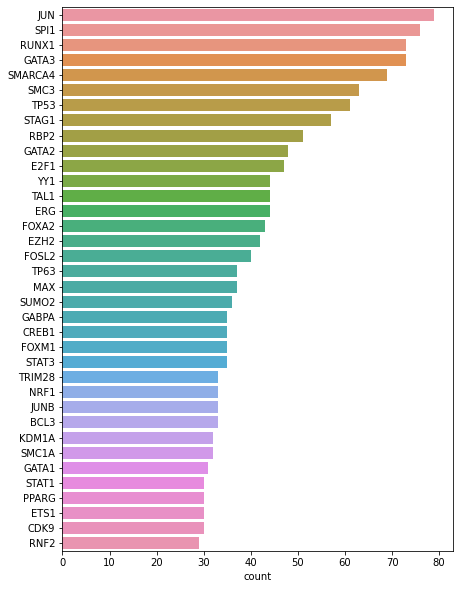

In [207]:
fig, ax = plt.subplots(figsize=(7, 10))
ax = sns.barplot(cnt_factor_table["count"][14:50], cnt_factor_table.index.tolist()[14:50])
fig.show()

In [291]:
# data_info = pd.read_csv('/fs/home/dongxin/Projects/SCRIPT/indices/human/tf_chip_qc_5fold_motif_giggle/info.txt', sep='\t', index_col=0)
data_info = pd.read_csv('/fs/home/dongxin/Projects/SCRIPT/indices/human/hm_chip_qc_5fold_giggle/info.txt', sep='\t', index_col=0)
# data_info = pd.read_csv('/fs/home/dongxin/Projects/SCRIPT/indices/mouse/tf_chip_qc_5fold/info.txt', sep='\t', index_col=0)
# data_info = pd.read_csv('/fs/home/dongxin/Projects/SCRIPT/indices/mouse/hm_chip_qc_5fold/info.txt', sep='\t', index_col=0)

In [292]:
total = data_info.shape[0]

tmp = data_info['Tissue_type'].value_counts()

In [293]:
break_number = int(0.02*total)
for i in enumerate(tmp.values):
    if i[1] < break_number:
        break_index = i[0]
        break

datas = list(tmp.values[0:break_index]) + [tmp.values[break_index:].sum()]

labels = list(tmp.index[0:break_index]) + [f'{tmp.values[break_index:].__len__()} Minor Tissue Types\nLess than 2%']
labels = [i if i != 'None' else 'Cell Lines or Unclassified' for i in labels ]

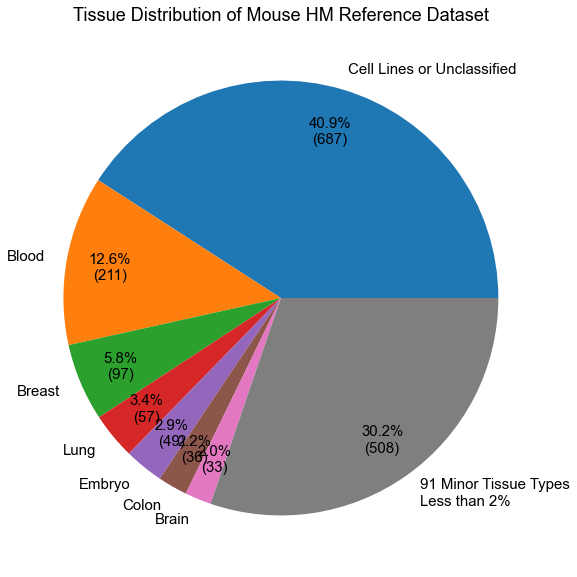

In [294]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig,ax = plt.subplots(figsize=[10,10])
ax.pie(datas, labels=labels, autopct=lambda pct: func(pct, total), pctdistance=0.8)
ax.set_title('Tissue Distribution of Mouse HM Reference Dataset')
fig.show()
fig.savefig('../../Figures/Tissue_distribution_mouse_hm.pdf', format='pdf')

/fs/home/dongxin/Applications/miniconda3/envs/SCRIPT/lib/python3.8/site-packages/seaborn-0.11.2-py3.8.egg/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


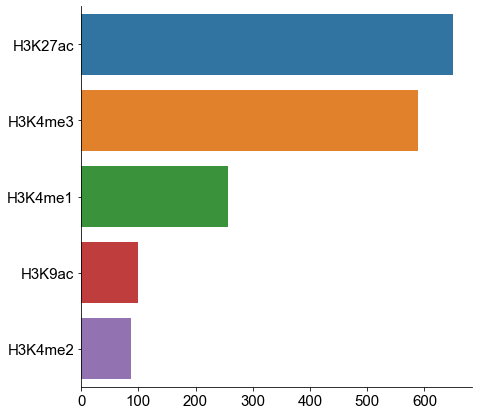

In [288]:
tmp = data_info['Factor'].value_counts()
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.barplot(tmp.values, tmp.index)
fig.show()
fig.savefig('../../Figures/human_hm_statistic_0_30.pdf', format='pdf')

/fs/home/dongxin/Applications/miniconda3/envs/SCRIPT/lib/python3.8/site-packages/seaborn-0.11.2-py3.8.egg/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/fs/home/dongxin/Applications/miniconda3/envs/SCRIPT/lib/python3.8/site-packages/seaborn-0.11.2-py3.8.egg/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


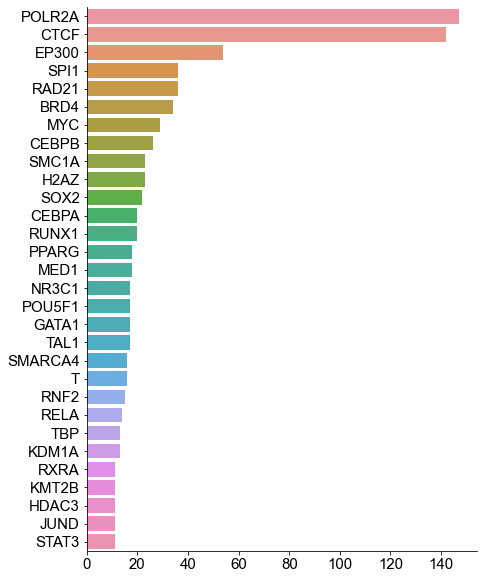

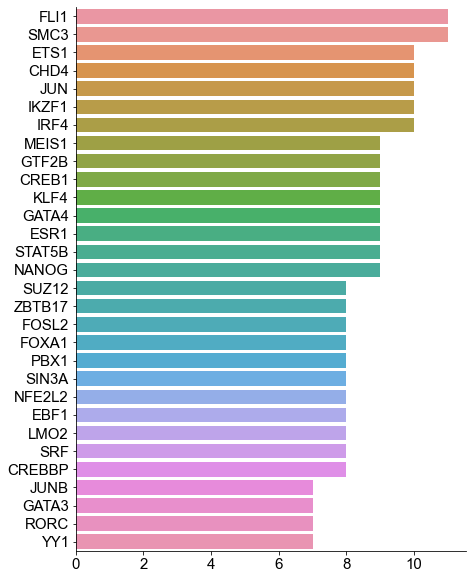

In [211]:
tmp = data_info['Factor'].value_counts()
fig, ax = plt.subplots(figsize=(7, 10))
ax = sns.barplot(tmp.values[0:30], tmp.index[0:30])
fig.show()
fig.savefig('../../Figures/mouse_tf_statistic_0_30.pdf', format='pdf')
fig, ax = plt.subplots(figsize=(7, 10))
ax = sns.barplot(tmp.values[30:60], tmp.index[30:60])
fig.show()
fig.savefig('../../Figures/mouse_tf_statistic_30_60.pdf', format='pdf')

/fs/home/dongxin/Applications/miniconda3/lib/python3.9/site-packages/seaborn-0.11.1-py3.9.egg/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


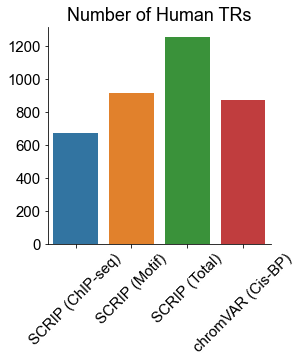

In [5]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(['SCRIP (ChIP-seq)', 'SCRIP (Motif)', 'SCRIP (Total)', 'chromVAR (Cis-BP)'], [671, 916, 1252, 870], orient='v')
ax.set_title('Number of Human TRs')
ax.tick_params(axis='x', rotation=45)
fig.show()
fig.savefig('../../Figures/human_tf.pdf', format='pdf', bbox_inches='tight')

/fs/home/dongxin/Applications/miniconda3/lib/python3.9/site-packages/seaborn-0.11.1-py3.9.egg/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


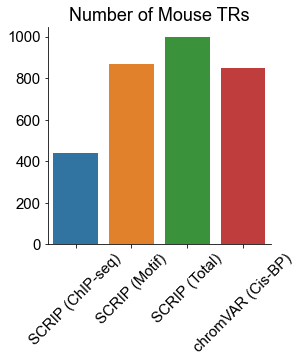

In [4]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(['SCRIP (ChIP-seq)', 'SCRIP (Motif)', 'SCRIP (Total)', 'chromVAR (Cis-BP)'], [440 , 866 ,997, 850], orient='v')
ax.set_title('Number of Mouse TRs')
ax.tick_params(axis='x', rotation=45)
fig.show()
fig.savefig('../../Figures/mouse_tf.pdf', format='pdf', bbox_inches='tight')

## bin generation

In [39]:
for binsize in [500, 1000, 5000]:
    chromsize = pd.read_csv('/fs/home/dongxin/Projects/SCRIPT/indices/reference/hg38_region/hg38.chrom.sizes', sep='\t', index_col=0, header=None)
    with open('/fs/home/dongxin/Projects/SCRIPT/indices/reference/hg38_region/hg38_bin_{binsize}.bed'.format(binsize=binsize), 'w+') as f:
        for i in chromsize.index:
            chr_length = chromsize.loc[i,1]
            for j in range(0,chr_length,binsize):
                start = j
                end = j + binsize
                chrom = i
                if end > chr_length:
                    end = chr_length
                f.write('{chrom}\t{start}\t{end}\n'.format(chrom=chrom, start=start, end=end))

In [40]:
for binsize in [500, 1000, 5000]:
    chromsize = pd.read_csv('/fs/home/dongxin/Projects/SCRIPT/indices/reference/mm10_region/mm10.chrom.sizes', sep='\t', index_col=0, header=None)
    with open('/fs/home/dongxin/Projects/SCRIPT/indices/reference/mm10_region/mm10_bin_{binsize}.bed'.format(binsize=binsize), 'w+') as f:
        for i in chromsize.index:
            chr_length = chromsize.loc[i,1]
            for j in range(0,chr_length,binsize):
                start = j
                end = j + binsize
                chrom = i
                if end > chr_length:
                    end = chr_length
                f.write('{chrom}\t{start}\t{end}\n'.format(chrom=chrom, start=start, end=end))

-----
## peak length distribution

In [14]:
path = '/fs/home/dongxin/Projects/SCRIPT/indices/human/tf_chip_qc_5fold_motif'
length = []
for i in [i for i in os.listdir(path) if i.endswith('bed.gz')]:
    tmp = pd.read_csv(path + '/' + i, sep='\t', header=None)
    length += (tmp[2] - tmp[1]).values.tolist()

In [ ]:
np.mean(length)

In [19]:
path = '/fs/home/dongxin/Projects/SCRIPT/indices/mouse/tf_chip_qc_5fold'
length = []
for i in [i for i in os.listdir(path) if i.endswith('bed.gz')]:
    tmp = pd.read_csv(path + '/' + i, sep='\t', header=None)
    length += (tmp[2] - tmp[1]).values.tolist()

In [20]:
np.mean(length)

331.5337686468348

In [26]:
np.mean(pd.read_csv('/fs/home/dongxin/Projects/SCRIPT/indices/mouse/tf_chip_qc_5fold/peaks_number.txt', sep='\t', header=None)[1])

21928.640625